## SARIMA(Superstore)

In [8]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
file_path = "C:\\Users\\Catello\\Desktop\\IAMDS2\\Statistiques\\TP2\\Superstore.xlsx"
data = pd.read_excel(file_path)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [3]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [4]:
data.groupby('Category')['Sales'].count()

Category
Furniture          2121
Office Supplies    6026
Technology         1847
Name: Sales, dtype: int64

In [5]:
df=data[data['Category']=='Furniture'].sort_values('Order Date')

In [6]:
df=df[['Order Date','Sales']]

In [7]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2121 entries, 7474 to 906
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  2121 non-null   datetime64[ns]
 1   Sales       2121 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 49.7 KB


In [15]:
df=df.set_index('Order Date')
df.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940


<Axes: xlabel='Order Date'>

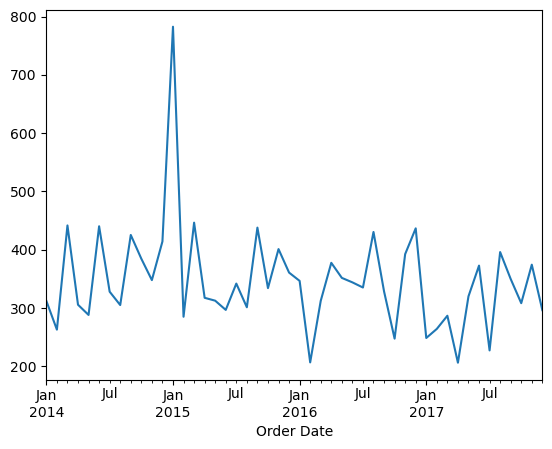

In [16]:
Y=df['Sales'].resample('MS').mean()
Y.plot()

In [17]:
Y_train=Y[:len(Y)-11]
Y_test=Y[len(Y)-11:]

<Axes: xlabel='Order Date'>

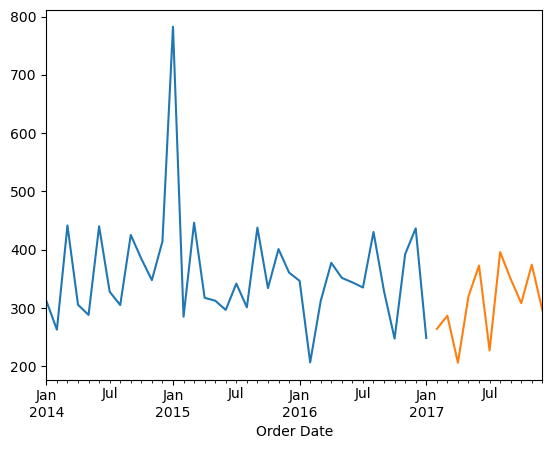

In [19]:
import matplotlib.pylab as plt 
Y_train.plot()
Y_test.plot()

In [23]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(Y)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The 'Sales' column is stationary.")
else:
    print("The 'Sales' column is non-stationary.")

ADF Statistic: -6.962405
p-value: 0.000000
The 'Sales' column is stationary.


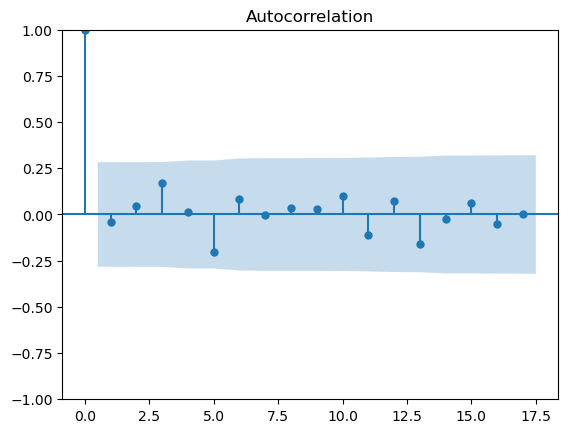

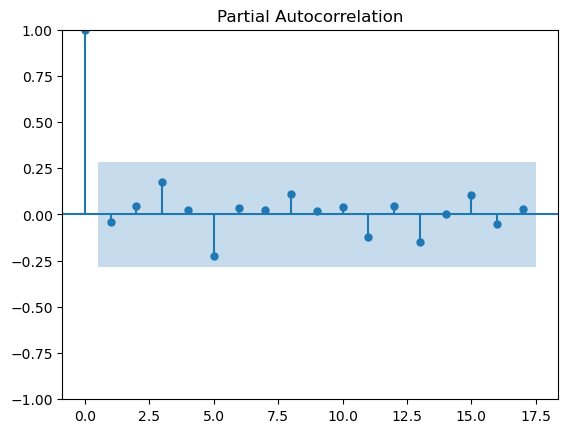

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(Y)
plt.show()

plot_pacf(Y)
plt.show()

In [28]:
import itertools
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))


In [29]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [30]:
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]

In [31]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [32]:
len(Y_train)

37

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

metric_aic_dict = {}

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(Y, order=param, seasonal_order=seasonal_param)
            model_fit = model.fit()

            # Calculate the AIC
            aic = model_fit.aic()

            # Store the results
            metric_aic_dict[(param, seasonal_param)] = aic
        except:
            continue


C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Initialize the dictionary to store AIC values
metric_aic_dict = {}

# Loop through all combinations of (p, d, q) and (P, D, Q, S)
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            # Fit the SARIMAX model
            model = SARIMAX(Y_train, order=param, seasonal_order=seasonal_param)
            model_fit = model.fit()

            # Calculate AIC
            aic = model_fit.aic

            # Store results in the dictionary
            metric_aic_dict[(param, seasonal_param)] = aic
        except:
            continue


C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Catello\Programmes\anaconda3\Lib\site-p

In [36]:
sorted_metric_aic_dict = {k: v for k, v in sorted(metric_aic_dict.items(), key=lambda x: x[1])}


In [37]:
sorted_metric_aic_dict

{((0, 1, 1), (0, 1, 1, 12)): 310.9485493016435,
 ((1, 1, 1), (0, 1, 1, 12)): 312.88723063968246,
 ((0, 1, 1), (1, 1, 1, 12)): 312.9441037812097,
 ((0, 1, 1), (1, 1, 0, 12)): 313.2451967463651,
 ((0, 1, 1), (0, 1, 0, 12)): 314.24672795897766,
 ((1, 1, 1), (1, 1, 1, 12)): 314.8745625943966,
 ((1, 1, 1), (1, 1, 0, 12)): 315.184258778553,
 ((1, 1, 0), (0, 1, 0, 12)): 315.89748968077026,
 ((1, 1, 1), (0, 1, 0, 12)): 316.0917171683746,
 ((1, 1, 0), (0, 1, 1, 12)): 316.80612857301617,
 ((1, 1, 0), (1, 1, 0, 12)): 317.0511528549455,
 ((0, 1, 0), (0, 1, 0, 12)): 317.5092048811482,
 ((0, 0, 0), (0, 1, 1, 12)): 317.6761340767064,
 ((0, 1, 0), (0, 1, 1, 12)): 318.1890881050295,
 ((0, 1, 0), (1, 1, 0, 12)): 318.24682346397003,
 ((1, 1, 0), (1, 1, 1, 12)): 318.41484853354257,
 ((0, 0, 0), (1, 1, 1, 12)): 319.5960749051222,
 ((0, 0, 1), (0, 1, 1, 12)): 319.6054463115854,
 ((1, 0, 0), (0, 1, 1, 12)): 319.619577879495,
 ((0, 1, 0), (1, 1, 1, 12)): 320.12481235521335,
 ((0, 0, 0), (1, 1, 0, 12)): 320.22

In [38]:
model=SARIMAX(Y_train,order=(0,1,1),seasonal_order=(0,1,1,12))
model_fit=model.fit()
predictions=model_fit.predict(start=len(Y_train),end=len(Y)-1)

3582.67


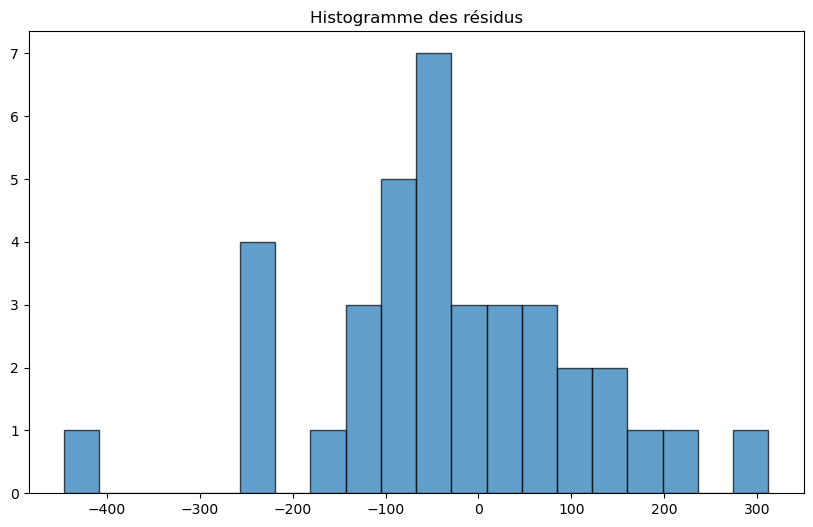

In [41]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,predictions)

print(mse.round(2))
import matplotlib.pyplot as plt
import scipy.stats as stats

# Histogramme des résidus
plt.figure(figsize=(10,6))
plt.hist(model_fit.resid, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogramme des résidus')
plt.show()

In [42]:
from scipy import stats

shapiro_test = stats.shapiro(model_fit.resid.dropna())
shapiro_statistic = shapiro_test[0]
shapiro_pvalue = shapiro_test[1]

print(f"Shapiro-Wilk Statistic: {shapiro_statistic.round(2)}")
print(f"P-value: {shapiro_pvalue.round(2)}")

if shapiro_pvalue > 0.05:
    print("Residuals are normally distributed.")
else:
    print("Residuals are not normally distributed.")


Shapiro-Wilk Statistic: 0.98
P-value: 0.71
Residuals are normally distributed.


In [43]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljungbox_result = acorr_ljungbox(model_fit.resid.dropna(), lags=[ 10], return_df=True)

lb_stat = ljungbox_result.iloc[0]['lb_stat']
lb_pvalue = ljungbox_result.iloc[0]['lb_pvalue']

print(f"Ljung-Box Statistic: {lb_stat.round(2)}")
print(f"P-value: {lb_pvalue.round(2)}")

if lb_pvalue > 0.05:
    print("No significant seasonality detected.")
else:
    print("Significant seasonality detected.")


Ljung-Box Statistic: 5.15
P-value: 0.88
No significant seasonality detected.


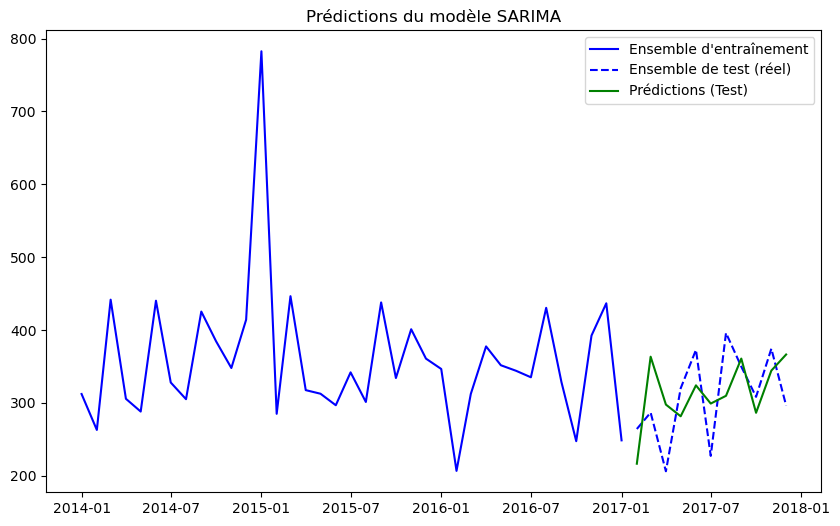

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(Y_train.index, Y_train.values, label='Ensemble d\'entraînement', color='blue')
plt.plot(Y_test.index, Y_test.values, label='Ensemble de test (réel)', color='blue', linestyle='--')
plt.plot(predictions.index, predictions, label='Prédictions (Test)', color='green')

plt.title('Prédictions du modèle SARIMA')
plt.legend()
plt.show()

## SARIMA(Catfish)

In [48]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Catello\\Desktop\\IAMDS2\\Statistiques\\TP2\\catfish.csv")
df.head()

,Date,Total
0,1986-1-01,9034
1,1986-2-01,9596
2,1986-3-01,10558
3,1986-4-01,9002
4,1986-5-01,9239


In [49]:
df.rename(columns={'Total': 'ventes'}, inplace=True)
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')

In [50]:
df.head()

,ventes
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239


<Axes: xlabel='Date'>

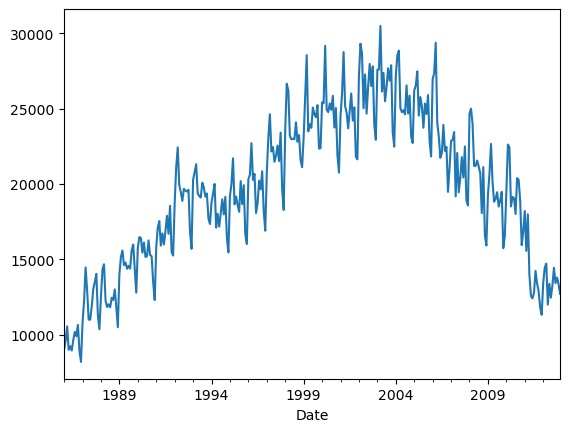

In [51]:
df['ventes'].plot()

In [52]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['ventes'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The 'Sales' column is stationary.")
else:
    print("The 'Sales' column is non-stationary.")

ADF Statistic: -1.589903
p-value: 0.488664
The 'Sales' column is non-stationary.


In [54]:
differenced = df['ventes'].diff()
differenced.head()

Date
1986-01-01       NaN
1986-02-01     562.0
1986-03-01     962.0
1986-04-01   -1556.0
1986-05-01     237.0
Name: ventes, dtype: float64

ADF Statistic: -4.310935
p-value: 0.000425
The 'Sales' column is stationary.


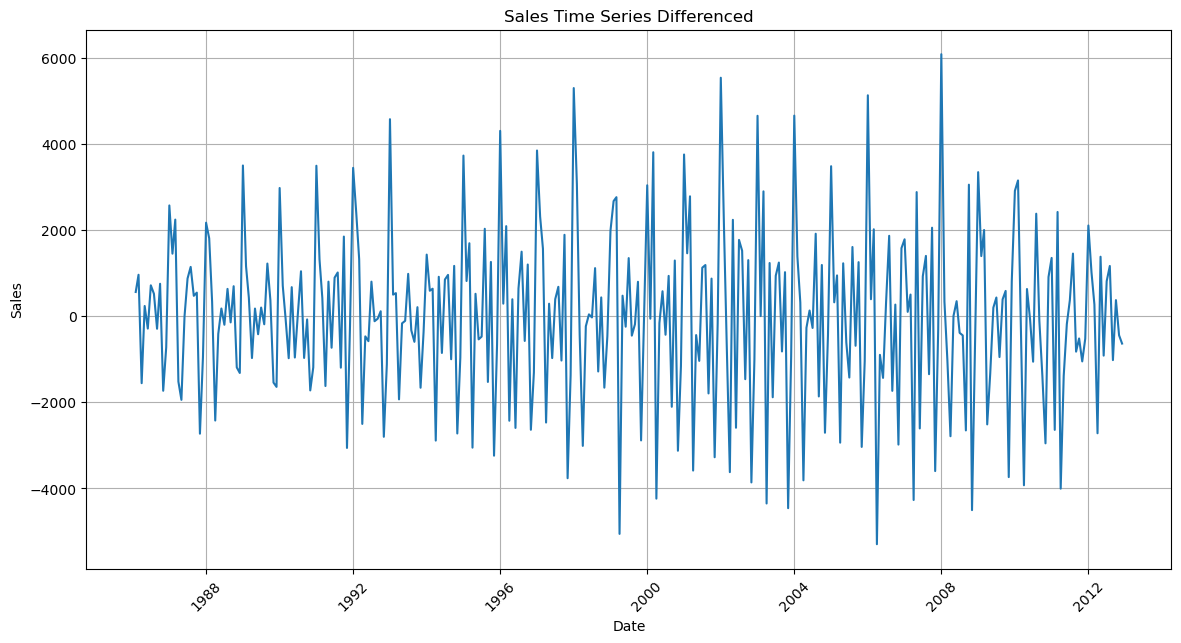

In [55]:
result = adfuller(differenced.dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The 'Sales' column is stationary.")
else:
    print("The 'Sales' column is non-stationary.")
    
plt.figure(figsize=(14,7))
plt.plot(differenced)
plt.title('Sales Time Series Differenced')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

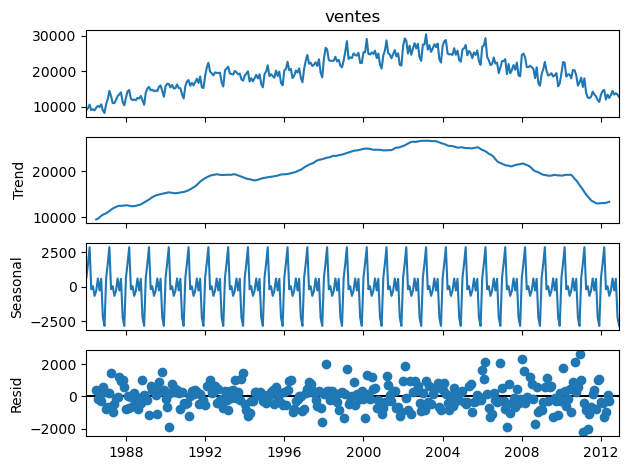

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['ventes'], model='additive', period=12)  # Modèle additif avec une périodicité de 12 (pour des données mensuelles par exemple)
decomposition.plot()
plt.show()

In [57]:
df2=decomposition.seasonal

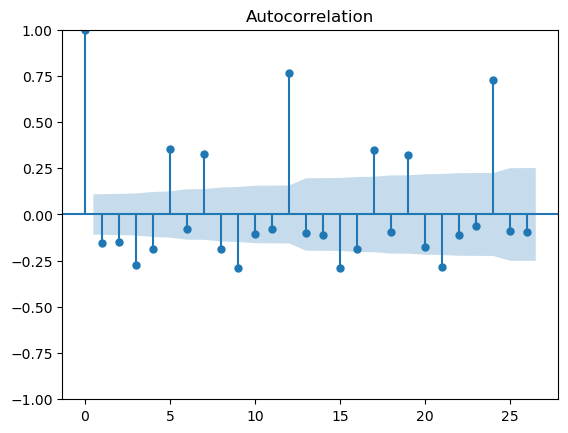

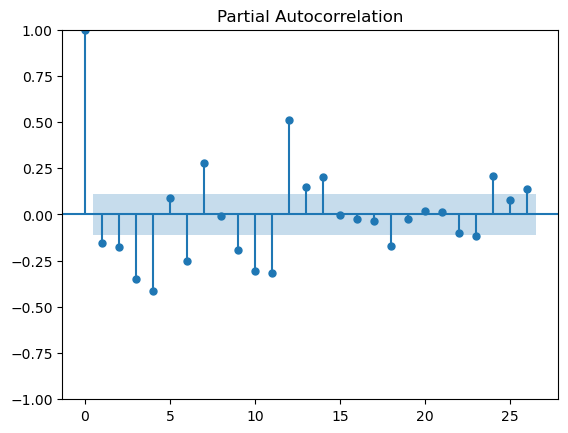

In [58]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(differenced.dropna())
plt.show()
plot_pacf(differenced.dropna())
plt.show()

In [59]:
differenced2=df['ventes'].diff(12)

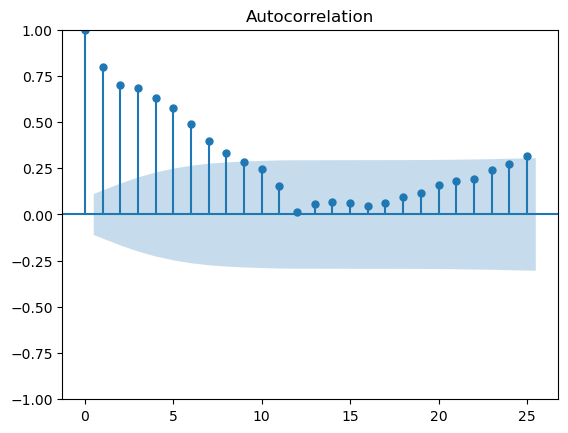

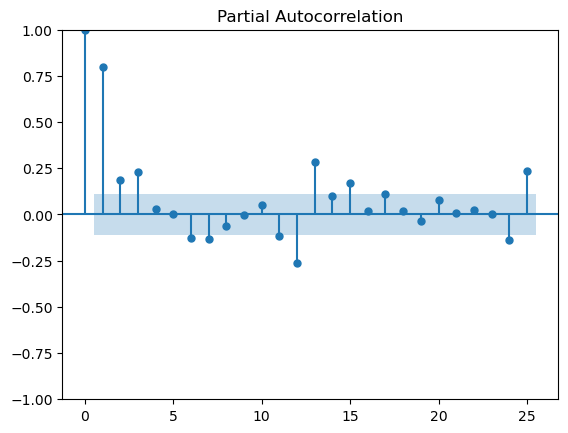

In [60]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(differenced2.dropna())
plt.show()
plot_pacf(differenced2.dropna())
plt.show()

In [61]:
train_size=int(len(df)*0.8)
train_data=df[:train_size]
test_data=df[train_size:]

In [62]:
my_order = (4,1,5)
my_seasonal_order = (3, 1, 8, 12)
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [63]:
model_fit=model.fit()

C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
print(model_fit.summary())

                                                 SARIMAX Results                                                 
Dep. Variable:                                                    ventes   No. Observations:                  259
Model:             SARIMAX(4, 1, 5)x(3, 1, [1, 2, 3, 4, 5, 6, 7, 8], 12)   Log Likelihood               -2006.598
Date:                                                   Wed, 25 Sep 2024   AIC                           4055.196
Time:                                                           09:50:39   BIC                           4128.808
Sample:                                                       01-01-1986   HQIC                          4084.836
                                                            - 07-01-2007                                         
Covariance Type:                                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------

In [65]:
predictions = model_fit.predict(start=len(train_data),end=len(df)-1)

1843.322031008147


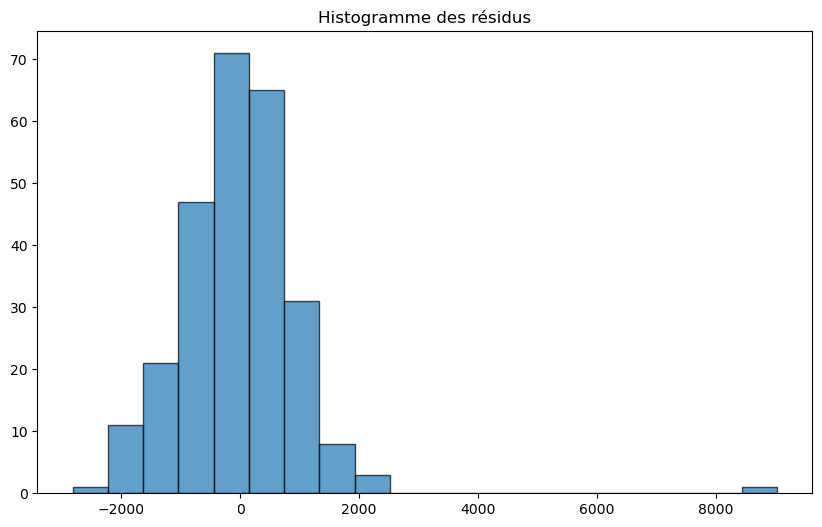

In [73]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse=mean_squared_error(predictions,test_data['ventes'])
print(np.sqrt(mse.round(2)))

import matplotlib.pyplot as plt
import scipy.stats as stats

plt.figure(figsize=(10,6))
plt.hist(model_fit.resid, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogramme des résidus')
plt.show()

In [74]:
from scipy import stats

shapiro_test = stats.shapiro(model_fit.resid.dropna())
shapiro_statistic = shapiro_test[0]
shapiro_pvalue = shapiro_test[1]

print(f"Shapiro-Wilk Statistic: {shapiro_statistic.round(2)}")
print(f"P-value: {shapiro_pvalue.round(2)}")

if shapiro_pvalue > 0.05:
    print("Residuals are normally distributed.")
else:
    print("Residuals are not normally distributed.")


Shapiro-Wilk Statistic: 0.85
P-value: 0.0
Residuals are not normally distributed.


## SARIMA(trend)

In [145]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Catello\\Desktop\\IAMDS2\\Statistiques\\TP2\\trend.csv")


In [146]:
print("Premières observations:")
print(df.head())

print("\nDernières observations:")
print(df.tail())

Premières observations:
  login_date  sales
0   1-Jan-14    120
1   2-Jan-14    122
2   3-Jan-14    132
3   4-Jan-14    136
4   5-Jan-14    145

Dernières observations:
   login_date  sales
26  27-Jan-14    470
27  28-Jan-14    490
28  29-Jan-14    500
29  30-Jan-14    510
30  31-Jan-14    520


In [147]:
df.columns = ['Mois', 'Ventes']
df = df.dropna()
df['Mois'] = pd.to_datetime(df['Mois'])
df.set_index('Mois', inplace=True)

In [148]:
print("\nCaractéristiques statistiques des ventes:")
print(df['Ventes'].describe().round(2))


Caractéristiques statistiques des ventes:
count     31.00
mean     316.52
std      136.53
min      120.00
25%      184.50
50%      320.00
75%      440.00
max      520.00
Name: Ventes, dtype: float64


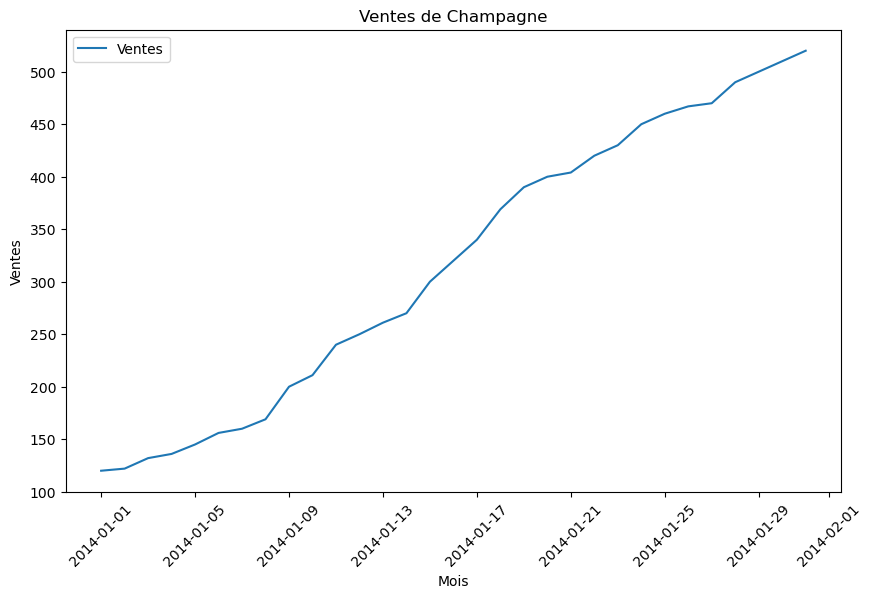

In [149]:
plt.figure(figsize=(10, 6))
plt.plot(df['Ventes'], label='Ventes')
plt.title('Ventes de Champagne')
plt.xlabel('Mois')
plt.ylabel('Ventes')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [150]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['Ventes'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The 'Sales' column is stationary.")
else:
    print("The 'Sales' column is non-stationary.")

ADF Statistic: 0.070192
p-value: 0.963966
The 'Sales' column is non-stationary.


In [151]:
differenced = df['Ventes'].diff()
differenced.head()

Mois
2014-01-01     NaN
2014-01-02     2.0
2014-01-03    10.0
2014-01-04     4.0
2014-01-05     9.0
Name: Ventes, dtype: float64

ADF Statistic: -4.746025
p-value: 0.000069
The 'Sales' column is stationary.


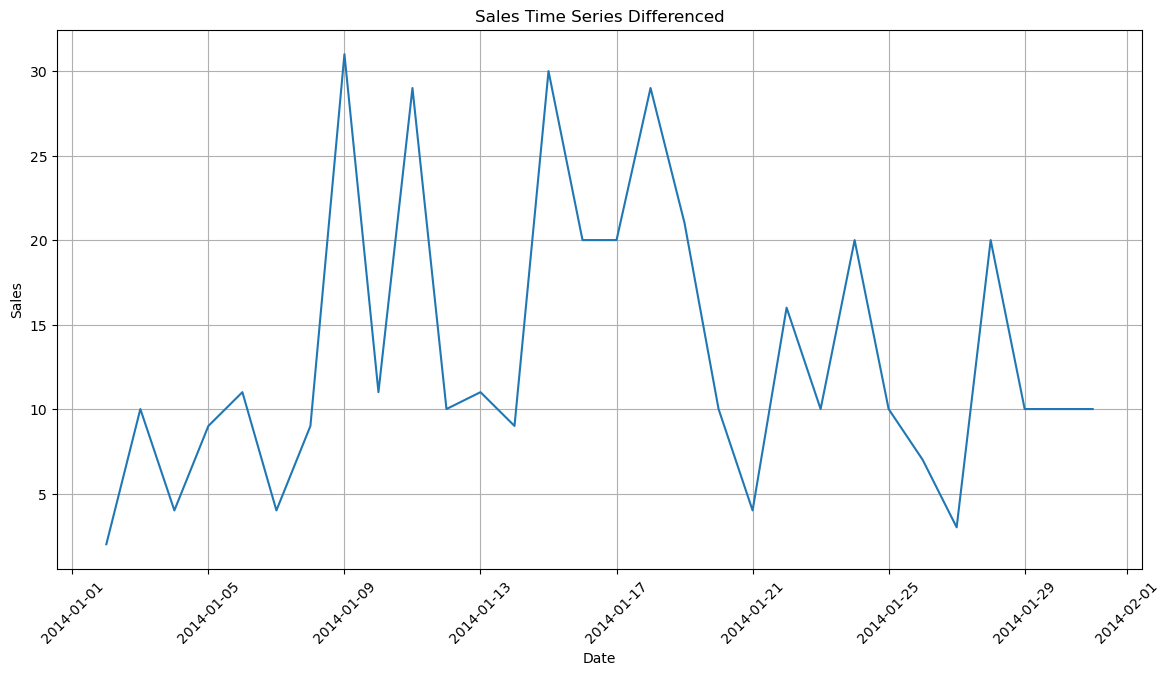

In [152]:
result = adfuller(differenced.dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The 'Sales' column is stationary.")
else:
    print("The 'Sales' column is non-stationary.")
    
plt.figure(figsize=(14,7))
plt.plot(differenced)
plt.title('Sales Time Series Differenced')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

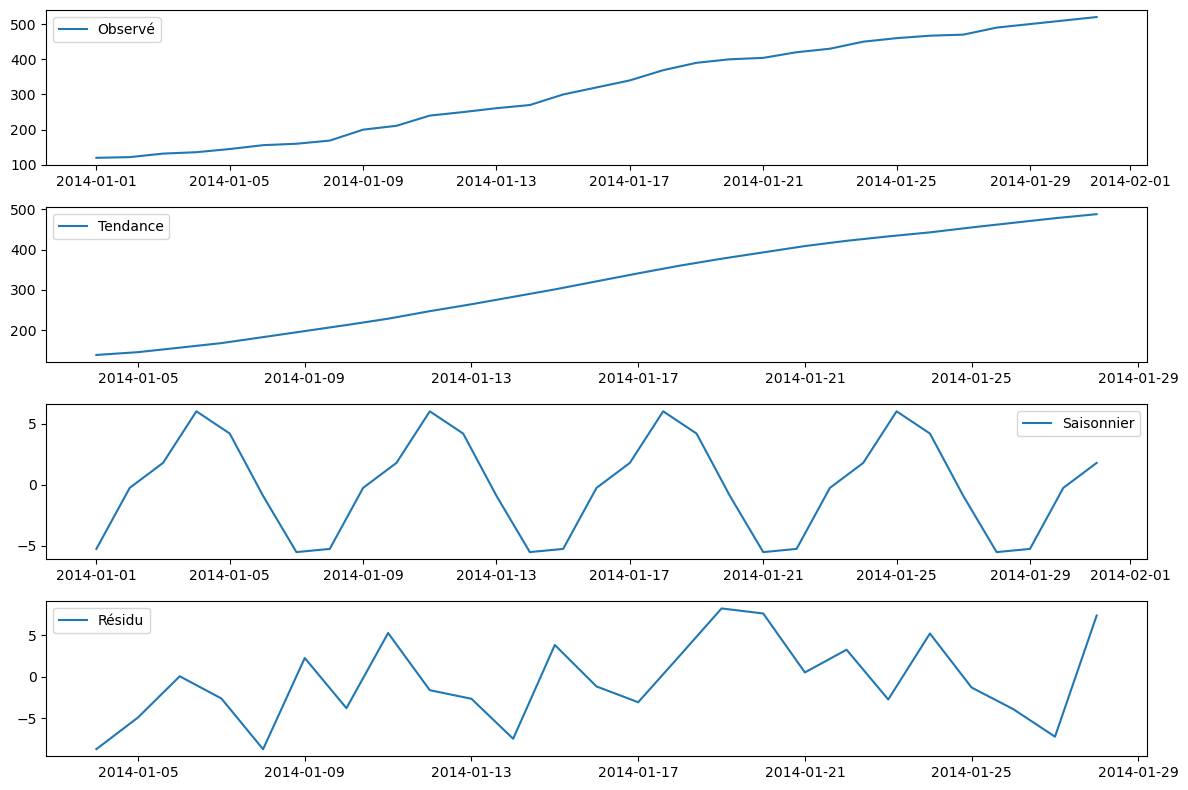

In [153]:
decomposition = seasonal_decompose(df['Ventes'].dropna(), model='additive')
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df['Ventes'], label='Observé')
plt.legend(loc='best')
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Tendance')
plt.legend(loc='best')
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Saisonnier')
plt.legend(loc='best')
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Résidu')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [154]:
print(df['Ventes'].describe().round(2))

count     31.00
mean     316.52
std      136.53
min      120.00
25%      184.50
50%      320.00
75%      440.00
max      520.00
Name: Ventes, dtype: float64


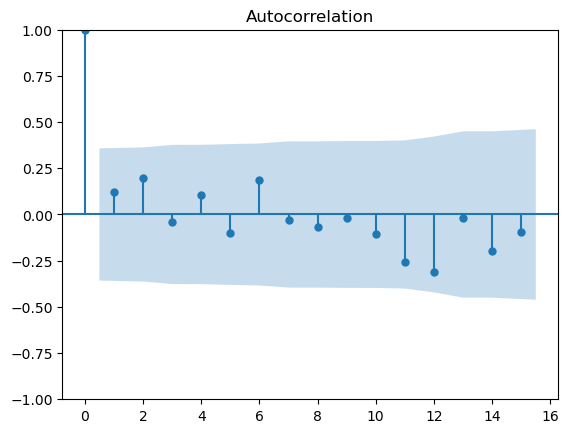

In [155]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pylab as plt
plot_acf(differenced.dropna())
plt.show()


In [156]:
import warnings
warnings.filterwarnings('ignore')

In [157]:
import itertools
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))

In [158]:
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]

In [159]:
train_size=int(len(df)*0.8)
train_data=df[:train_size]
test_data=df[train_size:]

In [190]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2016-01-01 to 2019-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Udemy   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [198]:
import pandas as pd
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Initialize the dictionary to store AIC values
metric_aic_dict = {}

# Loop through all combinations of (p, d, q) and (P, D, Q, S)
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            # Fit the SARIMAX model
            model = SARIMAX(train_data['Udemy'], order=param, seasonal_order=seasonal_param)
            model_fit = model.fit()
            
            # Calculate AIC
            aic = model_fit.aic

            # Store results in the dictionary
            metric_aic_dict[(param, seasonal_param)] = aic
        except:
            continue


In [192]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Initialize the dictionary to store AIC values
metric_aic_dict2 = {}

# Loop through all combinations of (p, d, q) and (P, D, Q, S)
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            # Fit the SARIMAX model
            model = SARIMAX(train_data, order=param, seasonal_order=seasonal_param)
            model_fit = model.fit()

            # Calculate AIC
            aic = model_fit.aic

            # Store results in the dictionary
            metric_aic_dict2[(param, seasonal_param)] = aic
        except:
            continue


In [196]:
sorted_metric_aic_dict

{((0, 1, 1), (0, 1, 1, 12)): 420.76351460951383,
 ((1, 1, 0), (0, 1, 1, 12)): 420.78795632519706,
 ((0, 1, 0), (0, 1, 1, 12)): 421.2939997370809,
 ((0, 1, 1), (1, 1, 0, 12)): 421.4737362684683,
 ((1, 1, 0), (1, 1, 0, 12)): 421.51546226859875,
 ((1, 1, 0), (1, 1, 1, 12)): 422.35794584620055,
 ((0, 1, 1), (1, 1, 1, 12)): 422.4300301856831,
 ((0, 1, 0), (1, 1, 0, 12)): 422.43474398136186,
 ((1, 1, 1), (0, 1, 1, 12)): 422.7634681171006,
 ((0, 1, 0), (1, 1, 1, 12)): 422.77984901218736,
 ((1, 1, 0), (0, 1, 0, 12)): 423.30538367189905,
 ((1, 1, 1), (1, 1, 0, 12)): 423.4711337234945,
 ((0, 1, 1), (0, 1, 0, 12)): 423.71647086617986,
 ((0, 1, 0), (0, 1, 0, 12)): 424.09203341062323,
 ((1, 1, 1), (1, 1, 1, 12)): 424.3500685809744,
 ((1, 1, 1), (0, 1, 0, 12)): 425.26287507583226,
 ((1, 0, 1), (0, 1, 1, 12)): 435.6095087132804,
 ((1, 0, 1), (1, 1, 0, 12)): 436.0830376692287,
 ((1, 0, 0), (0, 1, 1, 12)): 436.2369131382149,
 ((1, 0, 0), (1, 1, 0, 12)): 437.02066362573987,
 ((1, 0, 1), (1, 1, 1, 12)): 

In [203]:
sorted_metric_aic_dict2 = {k: v for k, v in sorted(metric_aic_dict2.items(), key=lambda x: x[1])}


In [204]:
sorted_metric_aic_dict2

{((0, 1, 1), (0, 1, 1, 12)): 420.76351460951383,
 ((1, 1, 0), (0, 1, 1, 12)): 420.78795632519706,
 ((0, 1, 0), (0, 1, 1, 12)): 421.2939997370809,
 ((0, 1, 1), (1, 1, 0, 12)): 421.4737362684683,
 ((1, 1, 0), (1, 1, 0, 12)): 421.51546226859875,
 ((1, 1, 0), (1, 1, 1, 12)): 422.35794584620055,
 ((0, 1, 1), (1, 1, 1, 12)): 422.4300301856831,
 ((0, 1, 0), (1, 1, 0, 12)): 422.43474398136186,
 ((1, 1, 1), (0, 1, 1, 12)): 422.7634681171006,
 ((0, 1, 0), (1, 1, 1, 12)): 422.77984901218736,
 ((1, 1, 0), (0, 1, 0, 12)): 423.30538367189905,
 ((1, 1, 1), (1, 1, 0, 12)): 423.4711337234945,
 ((0, 1, 1), (0, 1, 0, 12)): 423.71647086617986,
 ((0, 1, 0), (0, 1, 0, 12)): 424.09203341062323,
 ((1, 1, 1), (1, 1, 1, 12)): 424.3500685809744,
 ((1, 1, 1), (0, 1, 0, 12)): 425.26287507583226,
 ((1, 0, 1), (0, 1, 1, 12)): 435.6095087132804,
 ((1, 0, 1), (1, 1, 0, 12)): 436.0830376692287,
 ((1, 0, 0), (0, 1, 1, 12)): 436.2369131382149,
 ((1, 0, 0), (1, 1, 0, 12)): 437.02066362573987,
 ((1, 0, 1), (1, 1, 1, 12)): 

In [165]:
from statsmodels.tsa.arima.model import ARIMA
model=SARIMAX(train_data,order=(0,1,0),seasonal_order=(0,1,0,12))
model_fit=model.fit()
model=ARIMA(train_data,order=(1,1,1))
predictions=model_fit.predict(start=len(train_data),end=len(df)-1)

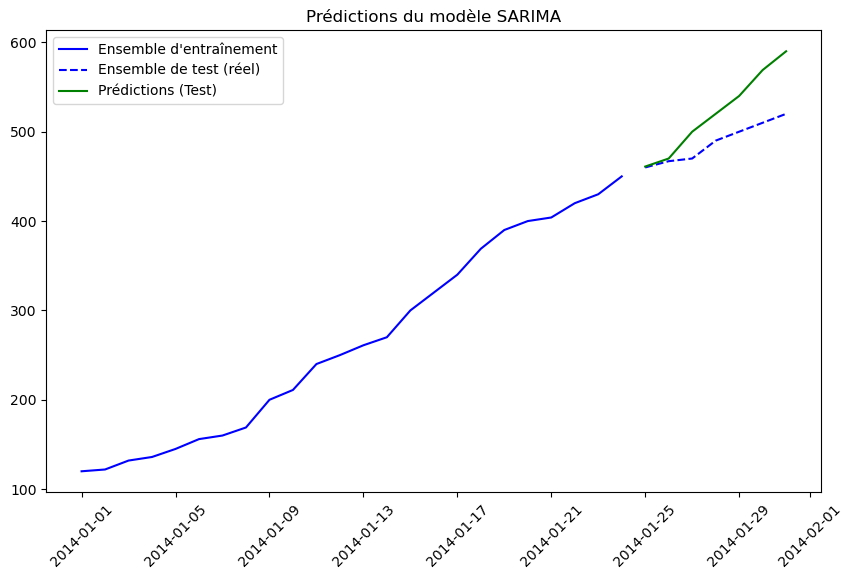

In [166]:
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Ensemble d\'entraînement', color='blue')
plt.plot(test_data.index, test_data.values, label='Ensemble de test (réel)', color='blue', linestyle='--')
plt.plot(predictions.index, predictions, label='Prédictions (Test)', color='green')


plt.title('Prédictions du modèle SARIMA')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## SARIMA(Udemy)

In [167]:
import pandas as pd
url = 'https://bit.ly/udemy_df'
df = pd.read_csv(url)
df.head()

,Date,Udemy,Easter,Christmas
0,1/1/2016,311,0,0
1,1/2/2016,564,0,0
2,1/3/2016,517,0,0
3,1/4/2016,652,0,0
4,1/5/2016,756,0,0


In [168]:
df=df[['Date','Udemy']]
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')
df.head()

,Udemy
Date,
2016-01-01,311
2016-01-02,564
2016-01-03,517
2016-01-04,652
2016-01-05,756


In [169]:
df.isnull().sum()

Udemy    0
dtype: int64

In [170]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The 'Sales' column is stationary.")
else:
    print("The 'Sales' column is non-stationary.")

ADF Statistic: -1.735518
p-value: 0.412911
The 'Sales' column is non-stationary.


In [171]:
differenced = df.diff()
differenced.head()

,Udemy
Date,
2016-01-01,NaN
2016-01-02,253.0
2016-01-03,-47.0
2016-01-04,135.0
2016-01-05,104.0


ADF Statistic: -11.143925
p-value: 0.000000
The 'Sales' column is stationary.


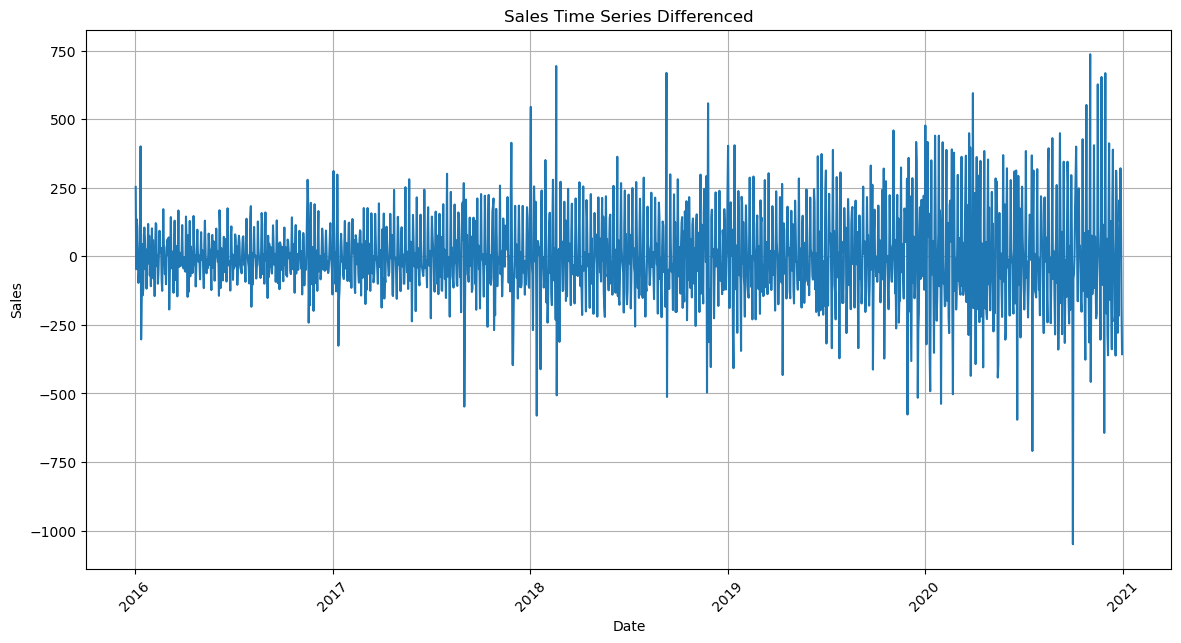

In [172]:
result = adfuller(differenced.dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The 'Sales' column is stationary.")
else:
    print("The 'Sales' column is non-stationary.")
    
plt.figure(figsize=(14,7))
plt.plot(differenced)
plt.title('Sales Time Series Differenced')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

60


<Axes: xlabel='Date'>

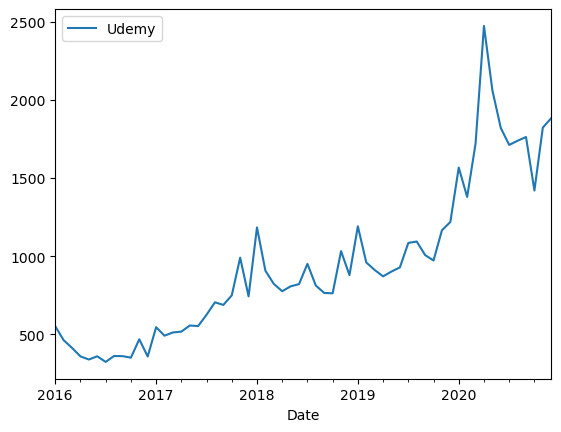

In [173]:
import matplotlib.pylab as plt
df=df.resample('MS').mean()
print(len(df))
df.plot()

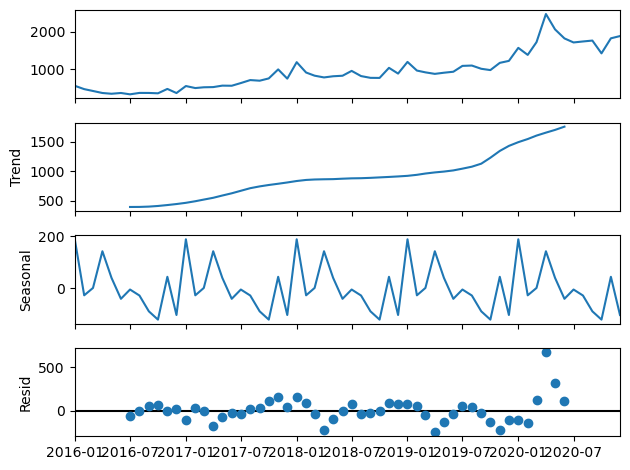

In [174]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, model='additive', period=12)  # Modèle additif avec une périodicité de 12 (pour des données mensuelles par exemple)
decomposition.plot()
plt.show()

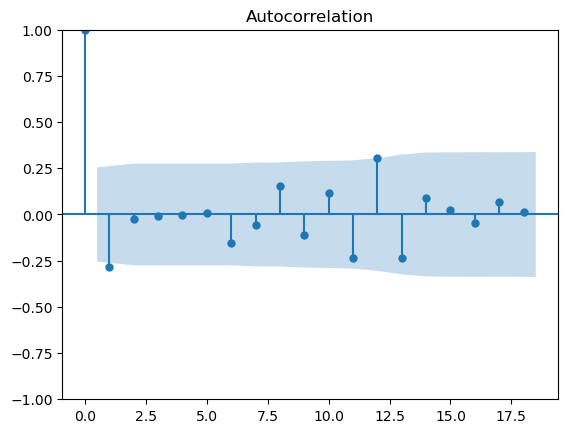

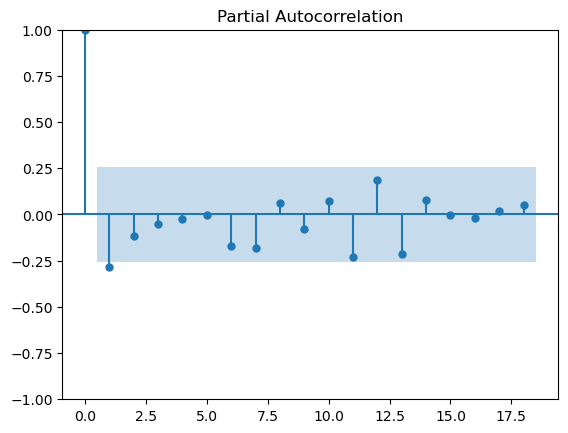

In [175]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
differenced=df.diff()
plot_acf(differenced.dropna())
plt.show()
plot_pacf(differenced.dropna())
plt.show()

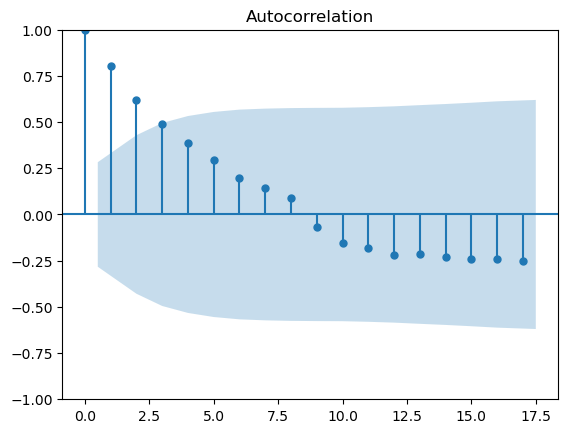

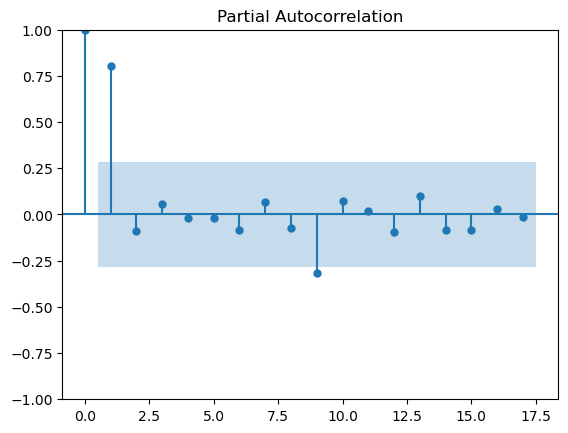

In [176]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
differenced2=df.diff(12)
plot_acf(differenced2.dropna())
plt.show()
plot_pacf(differenced2.dropna())
plt.show()

In [177]:
train_size=int(len(df)*0.8)
train_data=df[:train_size]
test_data=df[train_size:]

In [178]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_data,order=(1,1,1))
model_fit=model.fit()
predictions=model_fit.predict(start=train_size,end=len(df)-1)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Udemy   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -290.627
Date:                Wed, 25 Sep 2024   AIC                            587.254
Time:                        12:32:54   BIC                            592.805
Sample:                    01-01-2016   HQIC                           589.343
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5353      0.193     -2.769      0.006      -0.914      -0.156
ma.L1          0.0491      0.324      0.151      0.880      -0.586       0.684
sigma2      1.369e+04   2570.425      5.325      0.0

In [179]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(predictions,test_data)

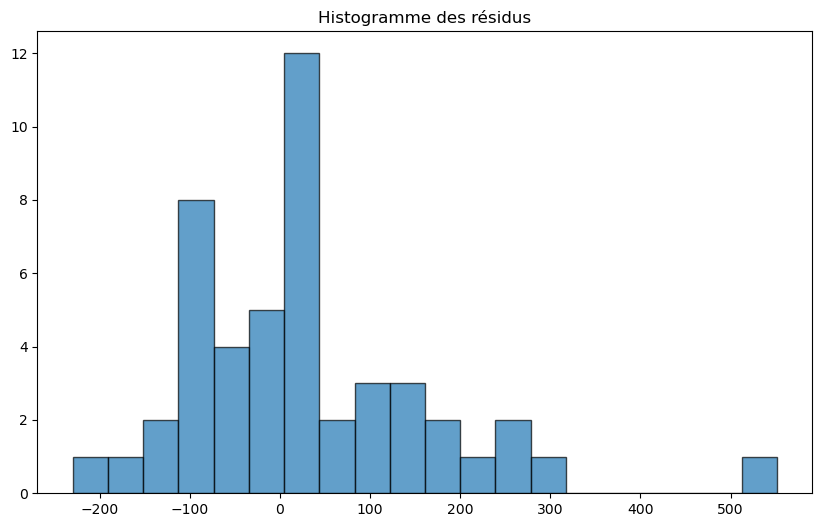

In [180]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Histogramme des résidus
plt.figure(figsize=(10,6))
plt.hist(model_fit.resid, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogramme des résidus')
plt.show()

In [181]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model2=SARIMAX(train_data,order=(1,1,1),seasonal_order=(1,1,2,12))

In [182]:
model2_fit=model2.fit()

In [183]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                   Udemy   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -206.903
Date:                                 Wed, 25 Sep 2024   AIC                            425.806
Time:                                         12:32:55   BIC                            435.138
Sample:                                     01-01-2016   HQIC                           429.027
                                          - 12-01-2019                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4077      0.901     -0.453      0.651      -2.173       1.358
ma.L1          0.1708      1.059      0.161      0.872      -1.905       2.246
ar.S.L12      -0.6042      0.517     -1.170      0.242      -1.617       0.408
ma.S.L12       0.0436     15.555      0.003      0.998     -30.444      30.531
ma.S.L24      -0.9563      0.592     -1.616      0.106      -2.116       0.204
sigma2      4747.2436      0.003   1.49e+06      0.000    4747.237    4747.250
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.06
Prob(Q):                              0.89   Prob(JB):                         0.97
Heteroskedasticity (H):               0.74   Skew:                            -0.10
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.12e+23. Standard errors may be unstable.
"""

In [184]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Udemy   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -290.627
Date:                Wed, 25 Sep 2024   AIC                            587.254
Time:                        12:32:55   BIC                            592.805
Sample:                    01-01-2016   HQIC                           589.343
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5353      0.193     -2.769      0.006      -0.914      -0.156
ma.L1          0.0491      0.324      0.151      0.880      -0.586       0.684
sigma2      1.369e+04   2570.425      5.325      0.000    8648.676    1.87e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.80   Prob(JB):                         0.26
Heteroskedasticity (H):               4.71   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [185]:
predictions2=model2_fit.predict(start=train_size,end=len(df)-1)
mse2=mean_squared_error(predictions2,test_data)

In [186]:
mse2-mse

-145105.9321941721